In [1]:
!pip install gymnasium

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 953.9/953.9 kB 4.5 MB/s eta 0:00:00


In [2]:
!pip install gym

This files contain all the result for Q-learning + Expected SARSA on Cartpole-v1

In [3]:
import gymnasium as gym
import numpy as np
import random
import gym
from gym.spaces import Discrete

In [4]:
def bin_divider(observation, bins, min, max):
  if (observation < min):
    return 0
  if (observation > max):
    return bins-1
  observe = observation - min
  diff_bin = (max - min)/bins
  return int(observe/ diff_bin)

def policy_encoding(state, action):
    encoded = np.zeros(81)
    encoded[80] = 1
    if action == 0:
      left_right = 0
    else:
      left_right = 40
    action_0_index = bin_divider(state[0], 10, -4.8, 4.8)+left_right
    action_1_index = bin_divider(state[1], 10, -10,10)+10+left_right
    action_2_index = bin_divider(state[2], 10, -0.42, 0.42)+20+left_right
    action_3_index = bin_divider(state[3], 10, -10, 10)+30+left_right
    encoded[action_0_index] = 1
    encoded[action_1_index] = 1
    encoded[action_2_index] = 1
    encoded[action_3_index] = 1
    return encoded

def tile_encoding(state):
    encoded = np.zeros(41)
    encoded[40] = 1
    action_0_index = bin_divider(state[0], 10, -4.8, 4.8)
    action_1_index = bin_divider(state[1], 10, -10,10)+10
    action_2_index = bin_divider(state[2], 10, -0.42, 0.42)
    action_3_index = bin_divider(state[3], 10, -10, 10)+30
    encoded[action_0_index] = 1
    encoded[action_1_index] = 1
    encoded[action_2_index] = 1
    encoded[action_3_index] = 1
    return encoded


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
def episolon_greedy_cart_pole(q, epsilon):
    if np.random.rand() < epsilon:
        return random.choice([0, 1])
    else:
        #softmax
        return np.argmax(q)
#our action can fall equally into 0-40

def q_learning(alpha, epsilon, temp, gamma,envi):
    env = gym.make(envi)
    returns = np.zeros((50, 1000))
    for run in range(50):
        print("run", run)
        theta = np.random.uniform(-0.001, 0.001, (1, 81))
        for e in range(1000):
            curr  = env.reset(seed = run)
            terminated = False
            truncated = False
            while not terminated and not truncated:
                #two things in the first line
                #encoded state
                encoded = tile_encoding(curr)
                #probability of the feature
                prob_0 = np.dot(theta, policy_encoding(curr, 0))
                prob_1 = np.dot(theta, policy_encoding(curr, 1))
                curr_action = episolon_greedy_cart_pole([prob_0, prob_1], epsilon)
                next_state, reward, terminated, truncated= env.step(curr_action)
                #value = env.step(curr_action)
                #print(value)
                #print(theta)
                if terminated:
                    target = [reward]
                else:
                    target = reward + gamma*max([np.dot(theta, policy_encoding(next_state, 0)), np.dot(theta, policy_encoding(next_state, 1))])
                    #print(target)
                theta += alpha*(target[0] - np.dot(theta, policy_encoding(curr, curr_action)))*policy_encoding(curr, curr_action)
                curr = next_state
                returns[run, e] += 1
            if e%200 == 199:
                print(returns[run, e])
    return returns

In [ ]:
envi = 'CartPole-v1'
returns = q_learning(1/16, 0.01, 1, 1,envi)
returns2 = q_learning(0.25, 0.01, 1, 1,envi)
returns3 =  q_learning(0.125, 0.01, 1, 1,envi)

In [ ]:
returns4 = q_learning(1/16, 0.05, 1, 1,envi)
returns5 = q_learning(0.25, 0.05, 1, 1,envi)
returns6 =  q_learning(0.125, 0.05, 1, 1,envi)
returns7 = q_learning(1/16, 0.1, 1, 1,envi)
returns8 = q_learning(0.25, 0.1, 1, 1,envi)
returns9 =  q_learning(0.125, 0.1, 1, 1,envi)

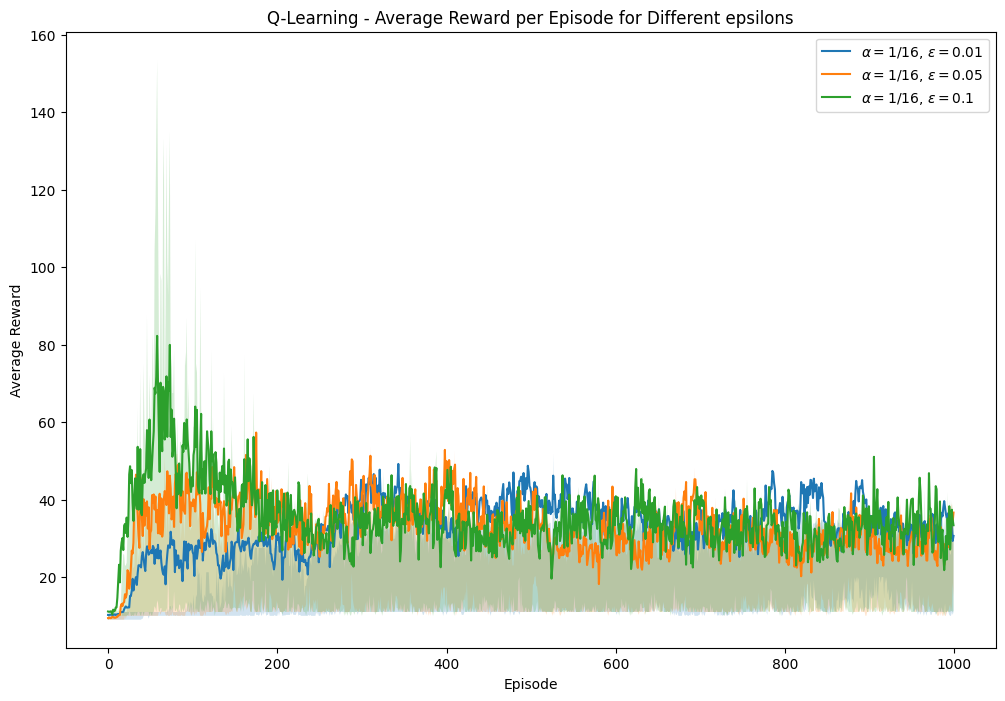

In [ ]:
import matplotlib.pyplot as plt

# alpha = 1/16
average_rewards = np.mean(returns, axis=0)
average_rewards4 = np.mean(returns4, axis=0)
average_rewards7 = np.mean(returns7, axis=0)

range_25_1, range_75_1 = np.percentile(returns, [25, 75], axis=0)
range_25_4, range_75_4 = np.percentile(returns4, [25, 75], axis=0)
range_25_7, range_75_7 = np.percentile(returns7, [25, 75], axis=0)

plt.figure(figsize=(12, 8))

plt.plot(average_rewards, label=r'$\alpha=1/16$, $\epsilon=0.01$')
plt.plot(average_rewards4, label=r'$\alpha=1/16$, $\epsilon=0.05$')
plt.plot(average_rewards7, label=r'$\alpha=1/16$, $\epsilon=0.1$')

plt.fill_between(range(len(average_rewards)), range_25_1, range_75_1, alpha=0.2)
plt.fill_between(range(len(average_rewards4)), range_25_4, range_75_4, alpha=0.2)
plt.fill_between(range(len(average_rewards7)), range_25_7, range_75_7, alpha=0.2)


plt.xlabel('Episode')
plt.ylabel('Average Reward')
plt.title('Q-Learning - Average Reward per Episode for Different epsilons')
plt.legend()

plt.show()

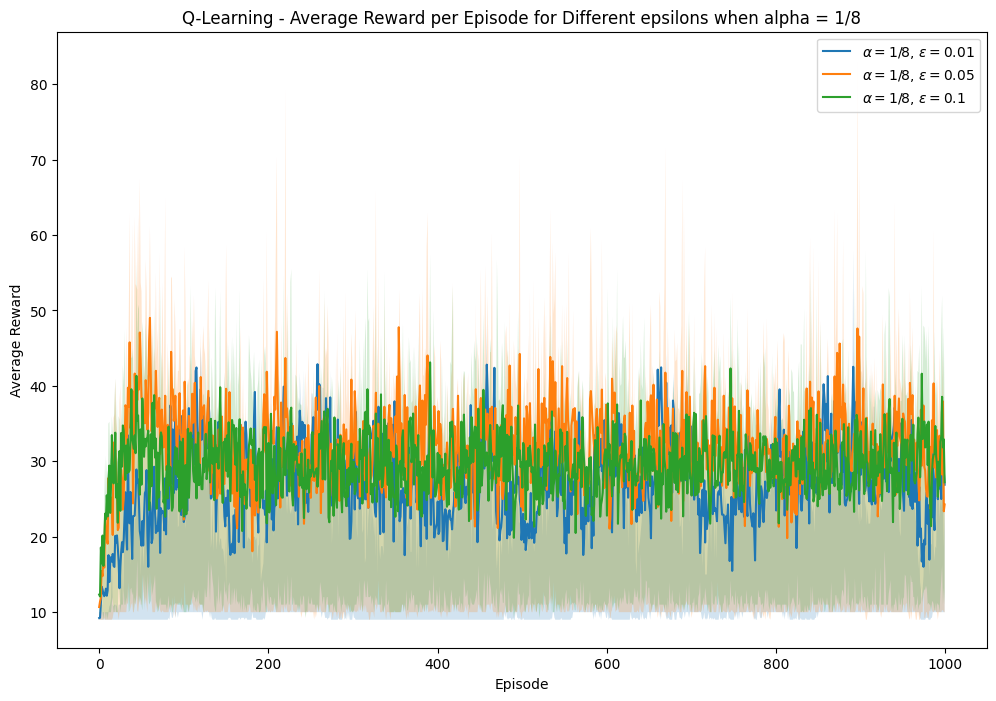

In [ ]:
# alpha = 1/8
average_rewards2 = np.mean(returns2, axis=0)
average_rewards5 = np.mean(returns5, axis=0)
average_rewards8 = np.mean(returns8, axis=0)

range_25_2, range_75_2 = np.percentile(returns2, [25, 75], axis=0)
range_25_5, range_75_5 = np.percentile(returns5, [25, 75], axis=0)
range_25_8, range_75_8 = np.percentile(returns8, [25, 75], axis=0)

plt.figure(figsize=(12, 8))

plt.plot(average_rewards2, label=r'$\alpha=1/8$, $\epsilon=0.01$')
plt.plot(average_rewards5, label=r'$\alpha=1/8$, $\epsilon=0.05$')
plt.plot(average_rewards8, label=r'$\alpha=1/8$, $\epsilon=0.1$')

plt.fill_between(range(len(average_rewards2)), range_25_2, range_75_2, alpha=0.2)
plt.fill_between(range(len(average_rewards5)), range_25_5, range_75_5, alpha=0.2)
plt.fill_between(range(len(average_rewards8)), range_25_8, range_75_8, alpha=0.2)

plt.xlabel('Episode')
plt.ylabel('Average Reward')
plt.title('Q-Learning - Average Reward per Episode for Different epsilons when alpha = 1/8')
plt.legend()

plt.show()

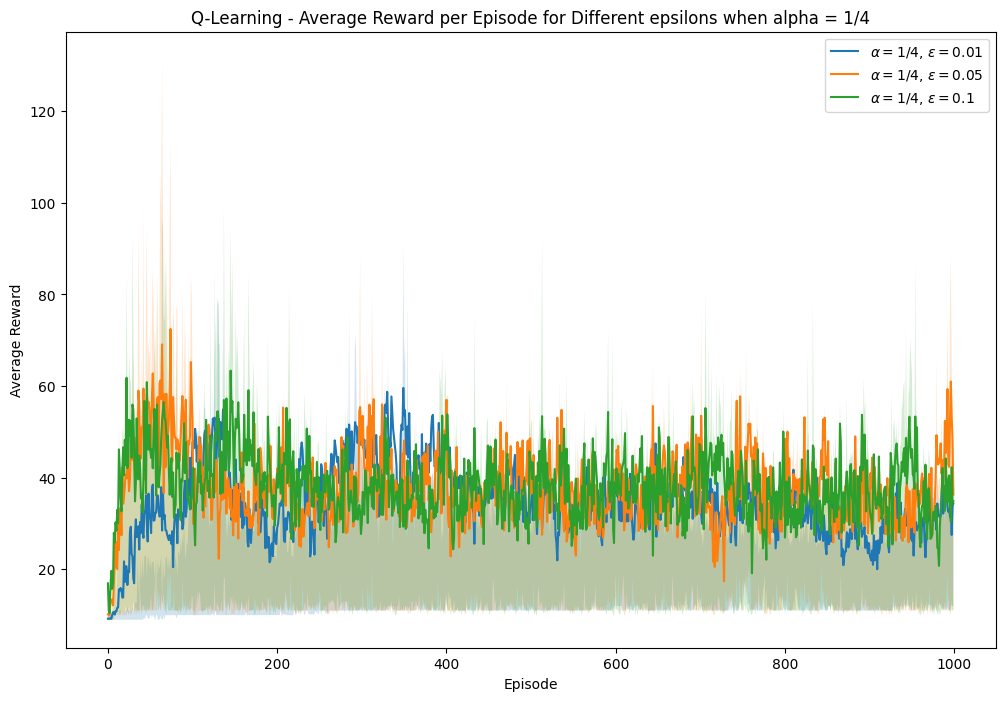

In [ ]:
# alpha = 1/4
average_rewards3 = np.mean(returns3, axis=0)
average_rewards6 = np.mean(returns6, axis=0)
average_rewards9 = np.mean(returns9, axis=0)

range_25_3, range_75_3 = np.percentile(returns3, [25, 75], axis=0)
range_25_6, range_75_6 = np.percentile(returns6, [25, 75], axis=0)
range_25_9, range_75_9 = np.percentile(returns9, [25, 75], axis=0)

plt.figure(figsize=(12, 8))

plt.plot(average_rewards3, label=r'$\alpha=1/4$, $\epsilon=0.01$')
plt.plot(average_rewards6, label=r'$\alpha=1/4$, $\epsilon=0.05$')
plt.plot(average_rewards9, label=r'$\alpha=1/4$, $\epsilon=0.1$')

plt.fill_between(range(len(average_rewards3)), range_25_3, range_75_3, alpha=0.2)
plt.fill_between(range(len(average_rewards6)), range_25_6, range_75_6, alpha=0.2)
plt.fill_between(range(len(average_rewards9)), range_25_9, range_75_9, alpha=0.2)

plt.xlabel('Episode')
plt.ylabel('Average Reward')
plt.title('Q-Learning - Average Reward per Episode for Different epsilons when alpha = 1/4')
plt.legend()

plt.show()

In [5]:
def episolon_greedy_cart_pole(q, epsilon):
    if np.random.rand() < epsilon:
        return random.choice([0, 1])
    else:
        #softmax
        return np.argmax(q)
#our action can fall equally into 0-40


def expected_sarsa(alpha, epsilon, temp, gamma,envi):
    env = gym.make(envi)
    returns = np.zeros((50, 1000))
    for run in range(50):
        print("run", run)
        theta = np.random.uniform(-0.001, 0.001, (1, 81))
        for e in range(1000):
            curr = env.reset(seed = run)
            terminated = False
            truncated = False
            while not terminated and not truncated:
                #two things in the first line
                #encoded state
                encoded = tile_encoding(curr)
                #probability of the feature
                prob_0 = np.dot(theta, policy_encoding(curr, 0))
                prob_1 = np.dot(theta, policy_encoding(curr, 1))
                curr_action = episolon_greedy_cart_pole([prob_0, prob_1], epsilon)
                next_state, reward, terminated, truncated= env.step(curr_action)
                #print(theta)
                if terminated:
                    target = [reward]
                else:
                    prob_next_0 = np.dot(theta, policy_encoding(next_state, 0))
                    prob_next_1 = np.dot(theta, policy_encoding(next_state, 1))
                    probs = []
                    for a in [0, 1]:
                      if a == np.argmax([prob_next_0, prob_next_1]):
                        prob_of_a = epsilon / 2 + (1 - epsilon) # probability of greedy action
                      else:
                        prob_of_a = epsilon / 2     # probability non-greedy action
                      probs.append(prob_of_a)
                    expected_value = 0
                    for a, next_prob in enumerate([prob_next_0, prob_next_1]):
                      expected_value += probs[a] * next_prob
                    expected_reward = sum(expected_value)
                    target = reward + gamma * expected_reward
                    #print(target)
                theta += alpha*(target - np.dot(theta, policy_encoding(curr, curr_action)))*policy_encoding(curr, curr_action)
                curr = next_state
                returns[run, e] += 1
            if e%200 == 199:
                print(returns[run, e])
    return returns

In [ ]:
envi = 'CartPole-v1'
returns_expSarsa1 = expected_sarsa(1/16, 0.01, 1, 1,envi)
returns_expSarsa2 = expected_sarsa(1/8, 0.01, 1, 1,envi)
returns_expSarsa3 = expected_sarsa(1/4, 0.01, 1, 1,envi)

In [ ]:
returns_expSarsa4 = expected_sarsa(1/16, 0.05, 1, 1,envi)
returns_expSarsa5 = expected_sarsa(1/8, 0.05, 1, 1,envi)
returns_expSarsa6 = expected_sarsa(1/4, 0.05, 1, 1,envi)
returns_expSarsa7 = expected_sarsa(1/16, 0.1, 1, 1,envi)
returns_expSarsa8 = expected_sarsa(1/8, 0.1, 1, 1,envi)
returns_expSarsa9 = expected_sarsa(1/4, 0.1, 1, 1,envi)


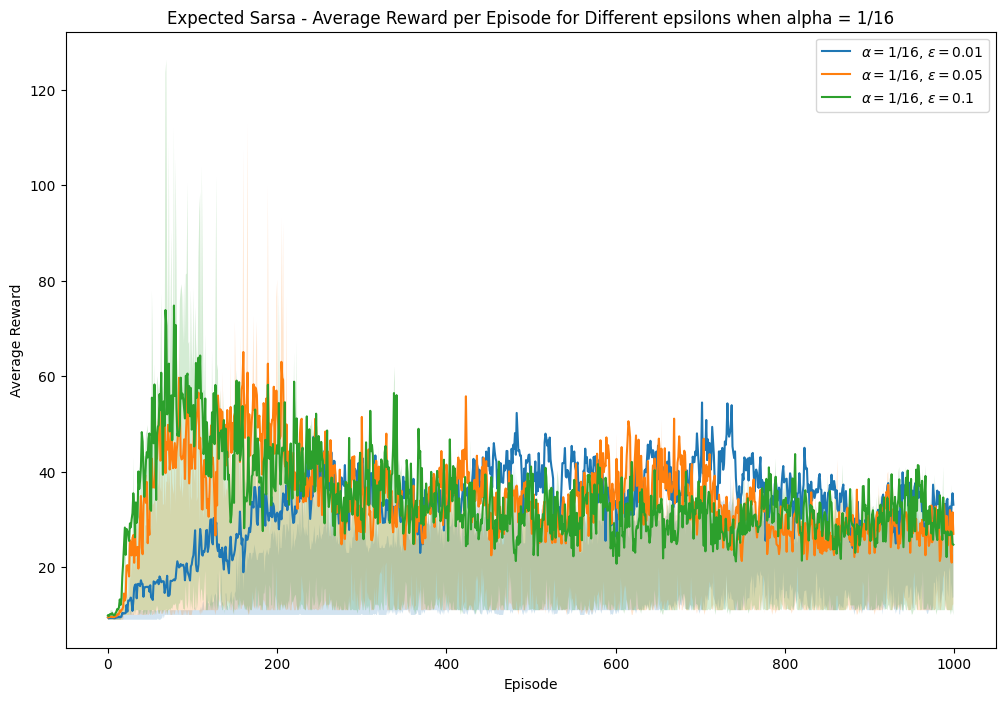

In [11]:
import matplotlib.pyplot as plt

# alpha = 1/16
average_rewards_expSarsa1 = np.mean(returns_expSarsa1, axis=0)
average_rewards4_expSarsa4 = np.mean(returns_expSarsa4, axis=0)
average_rewards7_expSarsa7 = np.mean(returns_expSarsa7, axis=0)

range_25_exp1, range_75_exp1 = np.percentile(returns_expSarsa1, [25, 75], axis=0)
range_25_exp4, range_75_exp4 = np.percentile(returns_expSarsa4, [25, 75], axis=0)
range_25_exp7, range_75_exp7 = np.percentile(returns_expSarsa7, [25, 75], axis=0)

plt.figure(figsize=(12, 8))

plt.plot(average_rewards_expSarsa1, label=r'$\alpha=1/16$, $\epsilon=0.01$')
plt.plot(average_rewards4_expSarsa4, label=r'$\alpha=1/16$, $\epsilon=0.05$')
plt.plot(average_rewards7_expSarsa7, label=r'$\alpha=1/16$, $\epsilon=0.1$')

plt.fill_between(range(len(average_rewards_expSarsa1)), range_25_exp1, range_75_exp1, alpha=0.2)
plt.fill_between(range(len(average_rewards4_expSarsa4)), range_25_exp4, range_75_exp4, alpha=0.2)
plt.fill_between(range(len(average_rewards7_expSarsa7)), range_25_exp7, range_75_exp7, alpha=0.2)

plt.xlabel('Episode')
plt.ylabel('Average Reward')
plt.title('Expected Sarsa - Average Reward per Episode for Different epsilons when alpha = 1/16')
plt.legend()

plt.show()

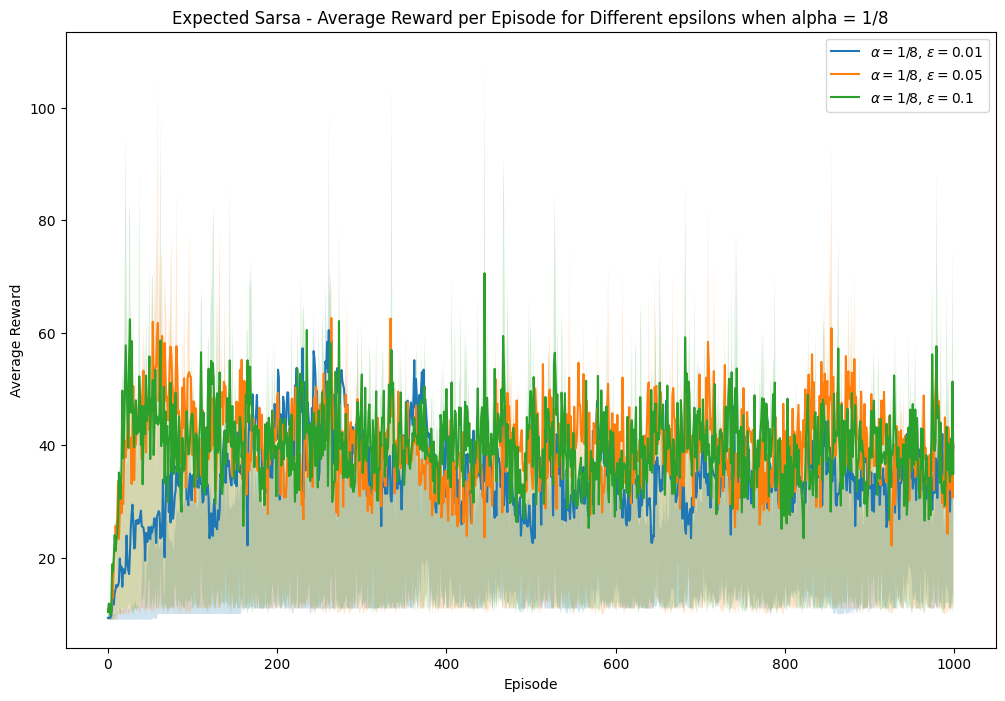

In [12]:
# alpha = 1/8
average_rewards_expSarsa2 = np.mean(returns_expSarsa2, axis=0)
average_rewards5_expSarsa5 = np.mean(returns_expSarsa5, axis=0)
average_rewards8_expSarsa8 = np.mean(returns_expSarsa8, axis=0)

range_25_exp2, range_75_exp2 = np.percentile(returns_expSarsa2, [25, 75], axis=0)
range_25_exp5, range_75_exp5 = np.percentile(returns_expSarsa5, [25, 75], axis=0)
range_25_exp8, range_75_exp8 = np.percentile(returns_expSarsa8, [25, 75], axis=0)

plt.figure(figsize=(12, 8))

plt.plot(average_rewards_expSarsa2, label=r'$\alpha=1/8$, $\epsilon=0.01$')
plt.plot(average_rewards5_expSarsa5, label=r'$\alpha=1/8$, $\epsilon=0.05$')
plt.plot(average_rewards8_expSarsa8, label=r'$\alpha=1/8$, $\epsilon=0.1$')

plt.fill_between(range(len(average_rewards_expSarsa2)), range_25_exp2, range_75_exp2, alpha=0.2)
plt.fill_between(range(len(average_rewards4_expSarsa4)), range_25_exp5, range_75_exp5, alpha=0.2)
plt.fill_between(range(len(average_rewards8_expSarsa8)), range_25_exp8, range_75_exp8, alpha=0.2)

plt.xlabel('Episode')
plt.ylabel('Average Reward')
plt.title('Expected Sarsa - Average Reward per Episode for Different epsilons when alpha = 1/8')
plt.legend()

plt.show()

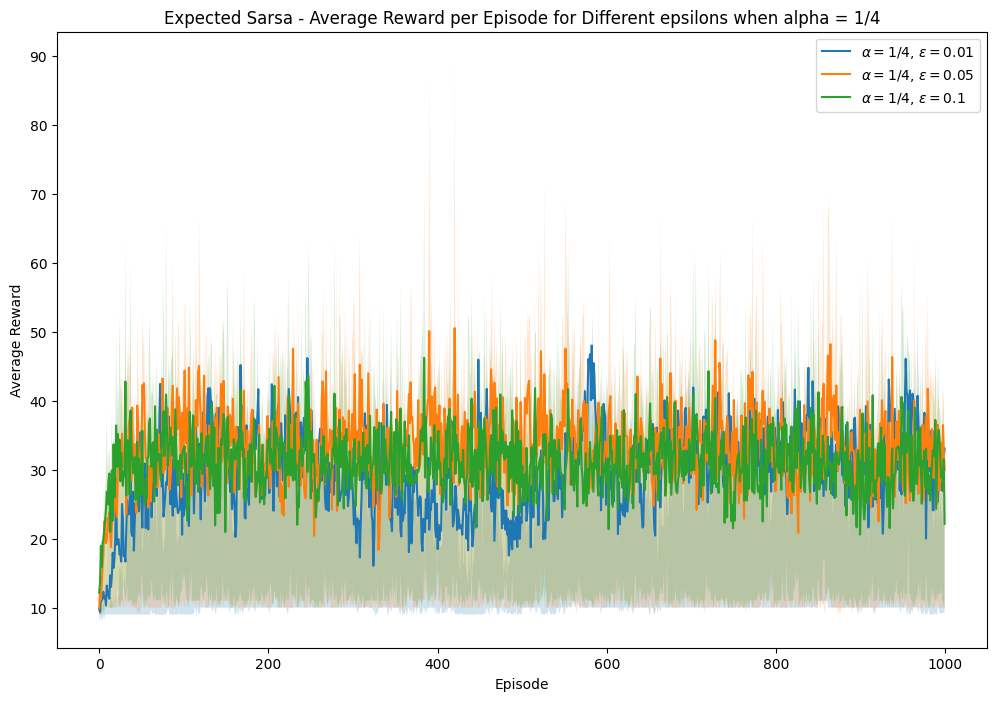

In [13]:
# alpha = 1/4
average_rewards_expSarsa3 = np.mean(returns_expSarsa3, axis=0)
average_rewards6_expSarsa6 = np.mean(returns_expSarsa6, axis=0)
average_rewards9_expSarsa9 = np.mean(returns_expSarsa9, axis=0)

range_25_exp3, range_75_exp3 = np.percentile(returns_expSarsa3, [25, 75], axis=0)
range_25_exp6, range_75_exp6 = np.percentile(returns_expSarsa6, [25, 75], axis=0)
range_25_exp9, range_75_exp9 = np.percentile(returns_expSarsa9, [25, 75], axis=0)

plt.figure(figsize=(12, 8))


plt.plot(average_rewards_expSarsa3, label=r'$\alpha=1/4$, $\epsilon=0.01$')
plt.plot(average_rewards6_expSarsa6, label=r'$\alpha=1/4$, $\epsilon=0.05$')
plt.plot(average_rewards9_expSarsa9, label=r'$\alpha=1/4$, $\epsilon=0.1$')

plt.fill_between(range(len(average_rewards_expSarsa3)), range_25_exp3, range_75_exp3, alpha=0.2)
plt.fill_between(range(len(average_rewards6_expSarsa6)), range_25_exp6, range_75_exp6, alpha=0.2)
plt.fill_between(range(len(average_rewards9_expSarsa9)), range_25_exp9, range_75_exp9, alpha=0.2)

plt.xlabel('Episode')
plt.ylabel('Average Reward')
plt.title('Expected Sarsa - Average Reward per Episode for Different epsilons when alpha = 1/4')
plt.legend()

plt.show()

First of all for Q-Learning, we set gamma=1 (so that it does not prefer immediate rewards over future ones) and a non-decaying epsilon for all experiments. As seen, in the first plot we use alpha=1/16 with different epsilons {0.01,0.05,0.1} . We observe that the result with epsilon=0.1 has a faster learning (reaches higher rewards earlier). This is followed by epsilon=0.05 and epsilon=0.01. We can say that the higher the epsilon, the faster learning we have. Despite these initial differences, the performance across all levels eventually converged to similar outcomes. We can say the same thing for the second plot and third plot (when alpha=1/8 and alpha =1/4, respectively). However, even though the average rewards are similar, the result with epsilon=0.05 is better in terms of average reward.


Now, for Expected SARSA, we again gave same value for gamma and a non-decaying epsilon. For the first plot, when alpha=1/16, we observe the highest average reward (around 80) and the fastest learning when epsilon=0.1. We see also that the setup with epsilon=0.01 having a slower learning but reaching eventually a high average reward. For the other plots, we observe the the combination with epsilon=0.1 has a faster learning and all levels eventually converge to similar outcomes.

We can conclue that Expected Sarsa performs slightly better overall and has faster learnings since it is more consistent and varies less across different parameters settings in this Cart Pole environment.